In [1]:
import pandas as pd #dataframe oluşturulmak için kullaılan kütüphanedir.
import matplotlib.pyplot as plt #grafik oluşturmak için kullanılır
import seaborn as sns # görselleşitrme için kullanılır
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats # istatistiksel analiz için kullanılır
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor # lineer regresyon fonksiyonu çağrılır.
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("SuperMarket Analysis.csv")

In [13]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


In [4]:
print(df.head()) # ilk 5 veriyi inceliyoruz

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [5]:
print(df.describe()) # veri seti hakkında genel bilgiler elde ediyoruz.
#ortalama, standart sapma, min ve max değerler gibi bilgileri görebiliyoruz.

        Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [6]:
print(df.info()) # veri setindeki kolonlar hakkında bilgi ediniyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
print(df.isnull().sum()) # kolonlarda boş veri var mı kontrolü sağlanıyor.

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


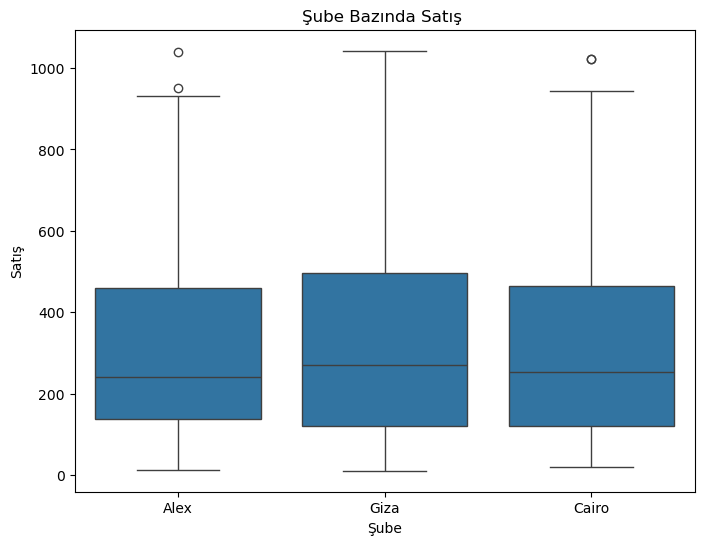

' Şube bazında satışları incelediğimizde alex ve cairo şubelerinde uç değer olarak adlandırılacak veriler olduğu gözlemlenmetedir. '

In [8]:
# matplotlib.pyplot ve seaborn kütüphanelerinden yararlanarak kutu grafiğini oluşturuyoruz.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='Sales', data=df)
plt.title('Şube Bazında Satış ')
plt.xlabel('Şube')
plt.ylabel('Satış')
plt.show()
""" Şube bazında satışları incelediğimizde alex ve cairo şubelerinde uç değer olarak adlandırılacak veriler olduğu gözlemlenmetedir. """

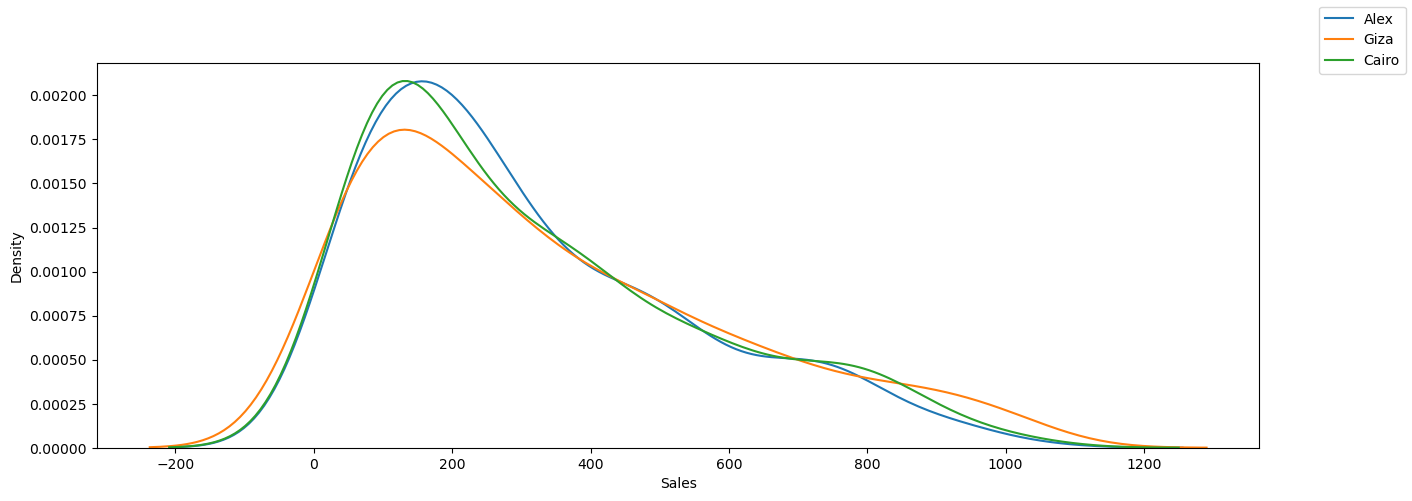

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

In [23]:
# Şube - Satış

fig = plt.figure(figsize=(15,5))
sns.distplot(df[df['Branch']=='Alex']['Sales'], hist=False)
sns.distplot(df[df['Branch']=='Giza']['Sales'], hist=False)
sns.distplot(df[df['Branch']=='Cairo']['Sales'], hist=False)


fig.legend(labels=['Alex', 'Giza', 'Cairo'])

plt.show()

location = df.Branch.value_counts()
location.head()

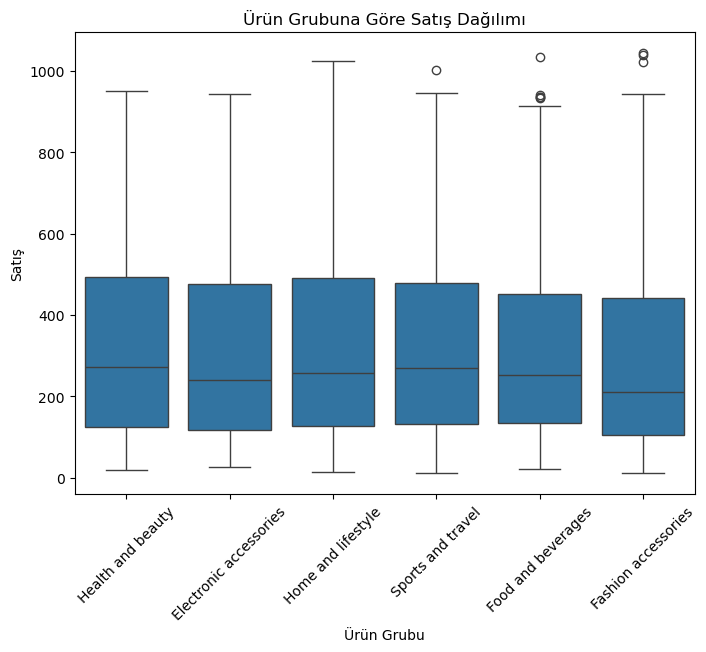

In [9]:
# Plot sales by product line
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product line', y='Sales', data=df)
plt.title('Ürün Grubuna Göre Satış Dağılımı')
plt.xticks(rotation=45)
plt.xlabel('Ürün Grubu')
plt.ylabel('Satış')
plt.show()

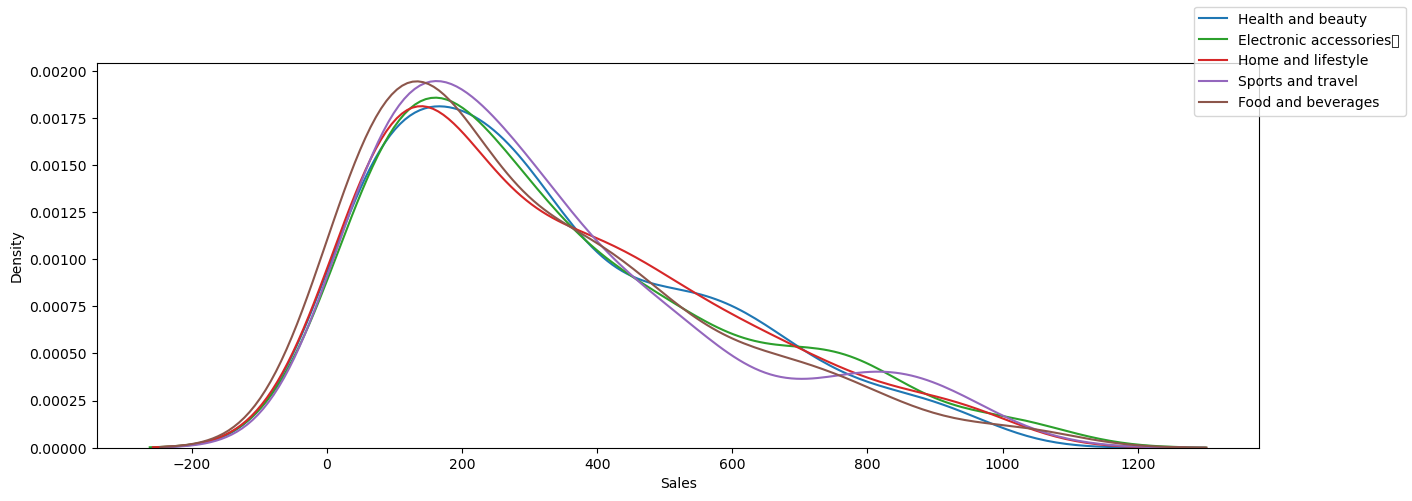

Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

In [24]:
fig = plt.figure(figsize=(15,5))
sns.distplot(df[df['Product line']=='Health and beauty']['Sales'], hist=False)
sns.distplot(df[df['Product line']=='Electronic accessories	']['Sales'], hist=False)
sns.distplot(df[df['Product line']=='Home and lifestyle']['Sales'], hist=False)
sns.distplot(df[df['Product line']=='Sports and travel']['Sales'], hist=False)
sns.distplot(df[df['Product line']=='Food and beverages']['Sales'], hist=False)
sns.distplot(df[df['Product line']=='Fashion accessories']['Sales'], hist=False)


fig.legend(labels=['Health and beauty', 'Electronic accessories	', 
                   'Home and lifestyle', 'Sports and travel',
                   'Food and beverages', 'Fashion accessories'])

plt.show()

location = df.Branch.value_counts()
location.head()

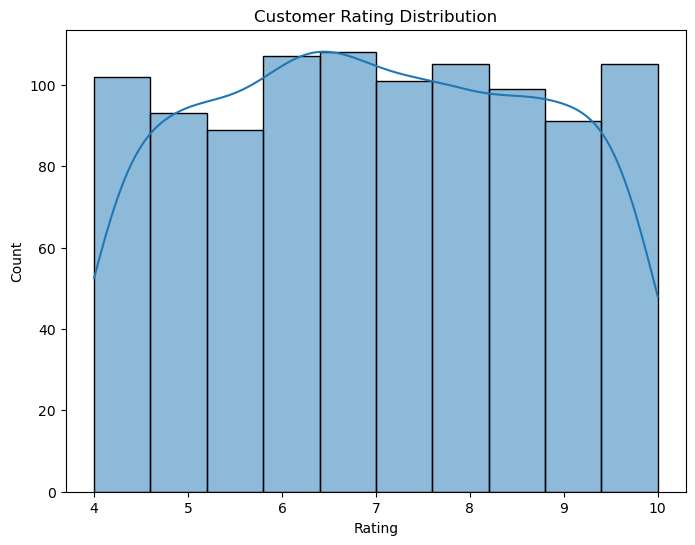

In [10]:
# Plot distribution of customer ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True) # Bu kod, df['Rating'] sütunundaki verilerin dağılımını 10 kutu ile bir histogramda gösterir 
# ve verinin dağılımını daha iyi anlayabilmek için bir yoğunluk eğrisi (kde) ekler.
plt.title('Customer Rating Distribution')
plt.show()

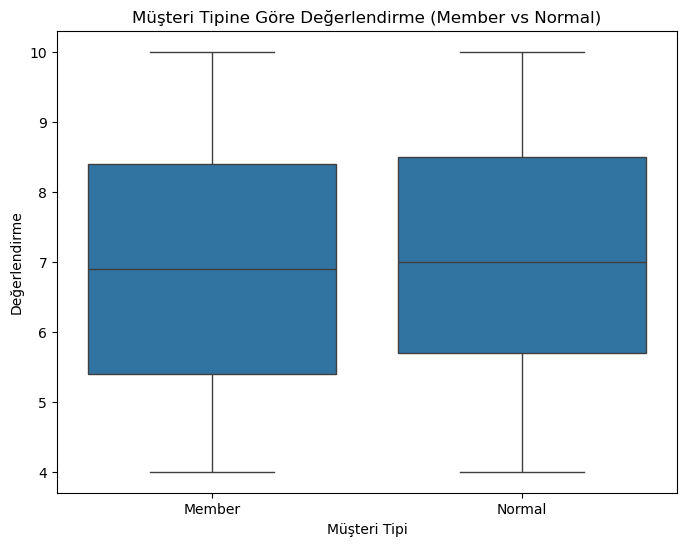

In [15]:
# değerlendrimeleri müşteri tipine göre yapmak için
plt.figure(figsize=(8, 6)) # Matplotlib kütüphanesinden figure fonksiyonu ile bir grafik figürü (çerçeve) oluşturduk.
# grafiğin boyutlarını 8 birim genişlik ve 6 birim yüksekli olacak şekilde figsize parametresi ile ayarladık.
sns.boxplot(x='Customer type', y='Rating', data=df)
plt.title('Müşteri Tipine Göre Değerlendirme (Member vs Normal)')
plt.xlabel('Müşteri Tipi')
plt.ylabel('Değerlendirme')
plt.show()

In [16]:
member_sales = df[df['Customer type'] == 'Member']['Sales'] 
#df[df['Customer type'] == 'Member']: df veri çerçevesinden yalnızca müşteri tipi "Member" olan satırları seçer.
#['Sales']: Sadece "Sales" sütunundaki verileri alır. Sonuç olarak, member_sales değişkeninde yalnızca üye müşterilere ait satış verileri olur.
normal_sales = df[df['Customer type'] == 'Normal']['Sales']

t_stat, p_value = stats.ttest_ind(member_sales, normal_sales)
print(f'T-statistic: {t_stat}, P-value: {p_value}')
#p değerinin 0.05 den küçük olması iki değer arasındaki farkın anlamlı olduğu anlamına gelir.
#t istatistiği değerinin daha büyük olması gruplar arasındaki farkın anlamlı olduğunu gösterir.

T-statistic: 1.8749713466198594, P-value: 0.0610885155152151


In [17]:
# Prepare data for modeling
X = df[['Unit price', 'Quantity', 'Branch', 'Payment', 'Customer type']]  # Features
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = df['gross income']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.342872524949871
